In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [16]:
col = ['Price','Rooms','location']

In [17]:
#Reading the Rent Data
Data = pd.read_csv('/Users/Navaneethan/Documents/scrapping_new.csv',names=col,header = None,sep = ',')


In [18]:
pd.options.display.max_rows = 1000

In [19]:
#Data tyoe conversion
Data['location'] = Data['location'].apply(lambda x : str(x))
Data['Rooms'] = Data['Rooms'].apply(lambda x : str(x))


In [20]:
#Creating a new column called Districts with all the District Values
Data['Districts'] = Data['location'].apply(lambda x : x[-10:])

In [21]:
Data.head()

,Price,Rooms,location,Districts
0,"€2,000 monthly","3 bedrooms (1 single, 2 double), 2 bathrooms, ...","Homeville Court, Knocklyon, Dublin 16",Dublin 16
1,"€1,272 monthly","1 bedroom (1 double), 1 bathroom, furnished","Beech House, Carrickmines Green, Carrickmines,...",Dublin 18
2,"€1,600 monthly","1 bedroom (1 double), 1 bathroom, furnished","Rockview, Sandyford, Dublin 18",Dublin 18
3,"€1,725 monthly","3 bedrooms (3 double), 2 bathrooms, furnished","Old River Road, Blanchardstown, Dublin 15",Dublin 15
4,"€1,700 monthly","2 bedrooms (2 double), 1 bathroom, furnished","Hybreasal House, Kilmainham, Dublin 8",", Dublin 8"


In [22]:
#Creating a new column called Bedroom_single with necessary conditions( one single bedroom = 1, Two single Bedroom = 2 etc)
Data['Bedroom_Single'] = np.where(Data['Rooms'].str.contains('1 single'), 1,
                                  (np.where(Data['Rooms'].str.contains('2 single'), 2,
                                            np.where(Data['Rooms'].str.contains('3 single'), 3, 0))))
                                                    

In [23]:
#Creating a new column called Bedroom_Double with necessary conditions( one Double bedroom = 1, Two Double Bedroom = 2 etc)

Data['Bedroom_Double'] = np.where(Data['Rooms'].str.contains('1 double'), 1,
                                  (np.where(Data['Rooms'].str.contains('2 double'), 2,
                                            np.where(Data['Rooms'].str.contains('3 double'), 3, 0))))


In [24]:
#Creating a new column called No_of_Bathrooms

Data['No_of_Bathrooms'] = np.where(Data['Rooms'].str.contains('1 bathroom'), 1,
                                  (np.where(Data['Rooms'].str.contains('2 bathrooms'), 2,
                                            np.where(Data['Rooms'].str.contains('3 bathrooms'), 3, 0))))

In [25]:
#Creating a new column called studio_apartment
Data['studio_apartment'] = np.where(Data['Rooms'].str.contains('studio'), 1,0)

In [26]:
Data.head()

,Price,Rooms,location,Districts,Bedroom_Single,Bedroom_Double,No_of_Bathrooms,studio_apartment
0,"€2,000 monthly","3 bedrooms (1 single, 2 double), 2 bathrooms, ...","Homeville Court, Knocklyon, Dublin 16",Dublin 16,1,2,2,0
1,"€1,272 monthly","1 bedroom (1 double), 1 bathroom, furnished","Beech House, Carrickmines Green, Carrickmines,...",Dublin 18,0,1,1,0
2,"€1,600 monthly","1 bedroom (1 double), 1 bathroom, furnished","Rockview, Sandyford, Dublin 18",Dublin 18,0,1,1,0
3,"€1,725 monthly","3 bedrooms (3 double), 2 bathrooms, furnished","Old River Road, Blanchardstown, Dublin 15",Dublin 15,0,3,2,0
4,"€1,700 monthly","2 bedrooms (2 double), 1 bathroom, furnished","Hybreasal House, Kilmainham, Dublin 8",", Dublin 8",0,2,1,0


In [27]:
#Cleaning the data in the column
Data['Districts'] = Data['Districts'].apply(lambda x : re.sub(r"[^a-zA-Z0-9]+", ' ',x))


In [28]:
#Removing the Euro symbol
Data['Price'] = Data['Price'].apply(lambda x : re.sub(r"[^0-9]+", '',x))

In [29]:
Data['Price'] = Data['Price'].apply(lambda x : int(x))
Data['Districts'] = Data['Districts'].apply(lambda x : str(x))
Data


,Price,Rooms,location,Districts,Bedroom_Single,Bedroom_Double,No_of_Bathrooms,studio_apartment
0,2000,"3 bedrooms (1 single, 2 double), 2 bathrooms, ...","Homeville Court, Knocklyon, Dublin 16",Dublin 16,1,2,2,0
1,1272,"1 bedroom (1 double), 1 bathroom, furnished","Beech House, Carrickmines Green, Carrickmines,...",Dublin 18,0,1,1,0
2,1600,"1 bedroom (1 double), 1 bathroom, furnished","Rockview, Sandyford, Dublin 18",Dublin 18,0,1,1,0
3,1725,"3 bedrooms (3 double), 2 bathrooms, furnished","Old River Road, Blanchardstown, Dublin 15",Dublin 15,0,3,2,0
4,1700,"2 bedrooms (2 double), 1 bathroom, furnished","Hybreasal House, Kilmainham, Dublin 8",Dublin 8,0,2,1,0
5,1191,studio apartment to rent,"Rathgar Road, Rathgar, Dublin 6",Dublin 6,0,0,0,1
6,1550,"2 bedrooms (2 double), 2 bathrooms, furnished","New Seskin Court, Tallaght, Dublin 24",Dublin 24,0,2,2,0
7,1069,"1 bedroom (1 single), 1 bathroom, furnished","11a Ardlea Road, Artane, Dublin 5",Dublin 5,1,0,1,0
8,1000,studio apartment to rent,"North Circular Road, (Pheonix park end), Dublin 7",Dublin 7,0,0,0,1
9,1300,"1 bedroom (1 double), 1 bathroom, furnished","The Island, Chapelizod, Dublin 20, Chapelizod,...",Dublin 20,0,1,1,0


In [30]:
Data.sort_values('Districts')

,Price,Rooms,location,Districts,Bedroom_Single,Bedroom_Double,No_of_Bathrooms,studio_apartment
115,1600,"1 bedroom (1 double), 1 bathroom, furnished","Spencer House, Custom House Square, IFSC, Dubl...",Dublin 1,0,1,1,0
90,1500,"1 bedroom (1 double), 1 bathroom, furnished","Bachelors Walk Dublin 1, Dublin 1",Dublin 1,0,1,1,0
459,245,"1 bedroom (1 double), 1 bathroom, furnished","Mayor Street, Dublin 1",Dublin 1,0,1,1,0
192,1560,"1 bedroom (1 double), 1 bathroom, furnished","Mountjoy Square Apartments, Mountjoy Place, Du...",Dublin 1,0,1,1,0
457,2000,"2 bedrooms (2 double), 1 bathroom, furnished","Block H, Castleforbes Sq, IFSC, Dublin 1",Dublin 1,0,2,1,0
266,1750,"1 bedroom (1 double), 1 bathroom, furnished","Jervis Place, Dublin 1",Dublin 1,0,1,1,0
258,220,"1 bedroom (1 double), 1 bathroom, furnished","NELSOn, Dublin 1",Dublin 1,0,1,1,0
253,1500,"1 bedroom (1 double), 1 bathroom, furnished","Arran Quay, Smithfield, Dublin 1",Dublin 1,0,1,1,0
251,1700,"1 bedroom (1 double), 1 bathroom, furnished","Tuskar Rock, Custom House Harbour, IFSC, Dublin 1",Dublin 1,0,1,1,0
84,1400,"1 bedroom (1 double), 1 bathroom, furnished","37 Bolton Street, Dublin 1",Dublin 1,0,1,1,0


In [229]:
Data[['location','Rooms']].groupby(Data['Districts']).count()

,location,Rooms
Districts,,
Dublin 1,43,43
Dublin 10,1,1
Dublin 11,10,10
Dublin 12,6,6
Dublin 13,8,8
Dublin 14,11,11
Dublin 15,30,30
Dublin 16,11,11
Dublin 17,2,2


In [240]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(Data['Districts'])
print(integer_encoded)

[ 7  9  9  6 20 17 13 16 19 11 18 21 17 17 22 20 10 21  9 22  7  6  9  9
  6  6 12 17 17 22 20 21 19 18 22 17 17 19 18 22  2 22 22  6 13 22 14  4
 14 17 22 19  7  6 13 22 18  6  7 13  9 20 15 19 17 22 20  5 22  9 22  4
 19  6  6 19 22 22 20 19 20 22 18 10  0 15 14  4 17 15  0  5  0  0 15  0
  0 22 15  0  0  0 15 15  0  0 22  0 15 22  0 19 17  5 20  0 18 20 22 20
 15 20 20  5 22 20 17  3 17  9 22 17  5 17  2 22 17 20 19 11 22  6 20 19
 17 12  6 22  0  6 22  3 14 14 14 17 22 10 10 22  0 19 22 17 17  0 22  0
  7 17 17  0 18 22  0 15 19 13 15 21 22 21  3 21  7 22  5 22 20 10  4 20
  0  6  0 19 22 22 20 19 17  9  5  2  9  9 10 17 22 17 17 17 22 22 22 21
 10 19 22 14  9  4 22 22 12 19 22  6  6  7 19 15  5 15 20 15 18  6 22  0
 22 14 19 10 10 21 17 12 10 13 19  0 22  0 11 22 10 20  0  6 12 17 17 22
 12  7  0  3  1 13 22 22  0 12 22 19  3 22  6  0 20  3 17 22 22 19 12 19
 15  6 14 22 20 21 20  0 14 20 12  0  2  6 20  9 22 22 22 22 17 22 15 20
  9  9 22 19 22 13 21  2 17  2  4 20  5 22  4  6  4

In [241]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [242]:
from numpy import array
from numpy import argmax
inverted = label_encoder.inverse_transform([argmax(onehot_encoded)])
print(inverted)

[' Dublin 16']


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [43]:

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
#data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = array(Data['Districts'])
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
#inverted = label_encoder.inverse_transform(onehot_encoded[3])
#print(inverted)

[' Dublin 16' ' Dublin 18' ' Dublin 18' ' Dublin 15' ' Dublin 8'
 ' Dublin 6' ' Dublin 24' ' Dublin 5' ' Dublin 7' ' Dublin 20'
 ' Dublin 6w' ' Dublin 9' ' Dublin 6' ' Dublin 6' 'Co Dublin' ' Dublin 8'
 ' Dublin 2' ' Dublin 9' ' Dublin 18' 'Co Dublin' ' Dublin 16'
 ' Dublin 15' ' Dublin 18' ' Dublin 18' ' Dublin 15' ' Dublin 15'
 ' Dublin 22' ' Dublin 6' ' Dublin 6' 'Co Dublin' ' Dublin 8' ' Dublin 9'
 ' Dublin 7' ' Dublin 6w' 'Co Dublin' ' Dublin 6' ' Dublin 6' ' Dublin 7'
 ' Dublin 6w' 'Co Dublin' ' Dublin 11' 'Co Dublin' 'Co Dublin'
 ' Dublin 15' ' Dublin 24' 'Co Dublin' ' Dublin 3' ' Dublin 13'
 ' Dublin 3' ' Dublin 6' 'Co Dublin' ' Dublin 7' ' Dublin 16' ' Dublin 15'
 ' Dublin 24' 'Co Dublin' ' Dublin 6w' ' Dublin 15' ' Dublin 16'
 ' Dublin 24' ' Dublin 18' ' Dublin 8' ' Dublin 4' ' Dublin 7' ' Dublin 6'
 'Co Dublin' ' Dublin 8' ' Dublin 14' 'Co Dublin' ' Dublin 18' 'Co Dublin'
 ' Dublin 13' ' Dublin 7' ' Dublin 15' ' Dublin 15' ' Dublin 7'
 'Co Dublin' 'Co Dublin' ' Dublin 8' ' D

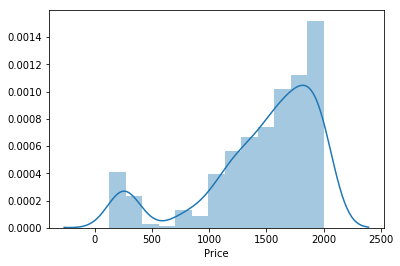

In [261]:
sns.distplot(Data['Price'])

In [262]:
Data.columns

Index(['Price', 'Rooms', 'location', 'Districts', 'Bedroom_Single',
       'Bedroom_Double', 'No_of_Bathrooms', 'studio_apartment'],
      dtype='object')

In [85]:
Data_new = Data.loc[Data['Districts'] == ' Dublin 15']
Data_new = Data_new.loc[Data['Price'] > 1000]

In [86]:
# define example
#data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = array(Data_new['Districts'])
#print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
#print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(np.shape(onehot_encoded))
# invert first example
#inverted = label_encoder.inverse_transform(onehot_encoded[3])
#print(inverted)

(27, 1)


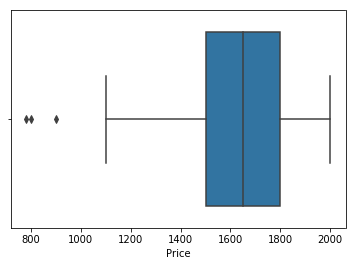

In [78]:
sns.boxplot(Data_new['Price'])

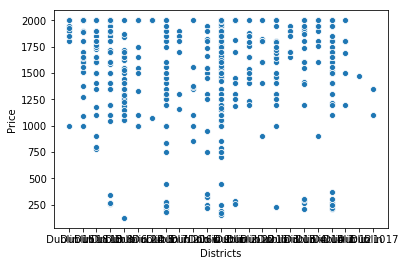

In [75]:
sns.scatterplot(Data['Districts'],Data['Price'])